🎯 Starting MNIST to Letters Transfer Learning (Updated)
📁 Expected folder structure:
   Images/
   ├── Training/ (A, B, C, D, E, NotA, NotB, NotC, NotD, NotE)
   └── Testing/  (A, B, C, D, E, NotA, NotB, NotC, NotD, NotE)
🚀 Initialized Transfer Learning Pipeline
📁 Data directory: Images
🔤 Letters to classify: ['A', 'B', 'C', 'D', 'E']
📏 Image size: (28, 28)
🚀 MNIST TO LETTERS TRANSFER LEARNING PIPELINE (UPDATED)

STEP 1: TRAINING CNN ON FULL MNIST DATASET
📊 MNIST Training data shape: (60000, 28, 28, 1)
📊 MNIST Training labels shape: (60000, 10)
📊 MNIST Test data shape: (10000, 28, 28, 1)


2025-07-23 12:33:51.072561: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-07-23 12:33:51.836360: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30977 MB memory:  -> device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:15:00.0, compute capability: 7.0



🏗️  MNIST Model Architecture:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPool

2025-07-23 12:33:54.239487: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8907


469/469 [==============================] - 4s 4ms/step - loss: 0.4027 - accuracy: 0.8711 - val_loss: 0.0787 - val_accuracy: 0.9765
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1095 - accuracy: 0.9683 - val_loss: 0.0602 - val_accuracy: 0.9821
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0779 - accuracy: 0.9773 - val_loss: 0.0540 - val_accuracy: 0.9853
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0659 - accuracy: 0.9811 - val_loss: 0.0512 - val_accuracy: 0.9861
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0520 - accuracy: 0.9847 - val_loss: 0.0503 - val_accuracy: 0.9856
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0420 - accuracy: 0.9876 - val_loss: 0.0481 - val_accuracy: 0.9872
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0400 - accuracy: 0.9883 - val_loss: 0.0505 - val_accuracy: 0.9869
Epoch 8/10
469/46

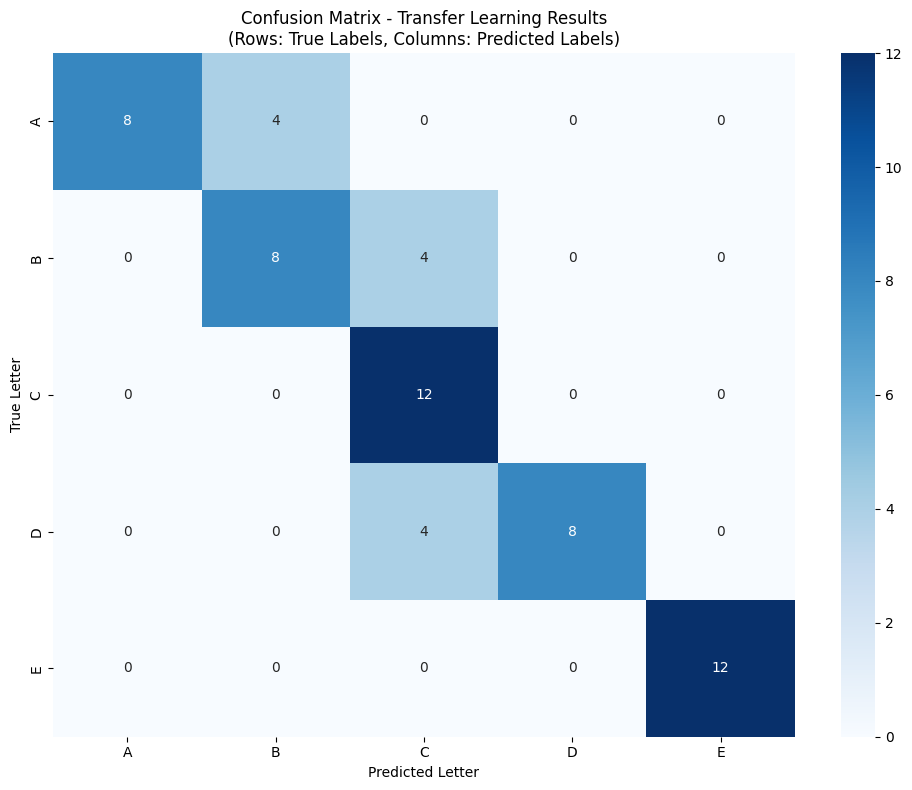


📈 Per-Class Performance Analysis:
Letter   Accuracy   Samples  Correct  Incorrect 
--------------------------------------------------
A        0.6667     12       8        4         
B        0.6667     12       8        4         
C        1.0000     12       12       0         
D        0.6667     12       8        4         
E        1.0000     12       12       0         
--------------------------------------------------
Overall  0.8000     60       48       12        

🎯 Prediction Confidence Analysis:
   Average confidence: 0.9158
   Confidence std: 0.1786
   Min confidence: 0.4297
   Max confidence: 0.9998

🎉 TRANSFER LEARNING PIPELINE COMPLETED!
⏱️  Total execution time: 27.98 seconds

✅ Model saved as 'mnist_to_letters_transfer_updated.h5'

🔍 Testing sample predictions...

📸 Sample Predictions:
------------------------------------------------------------
📷 Images/Testing/A/A1.jpg
   Predicted: A (confidence: 0.9771)
   All probs: A:0.977, B:0.023, C:0.000, D:0.000, E:0.000



In [1]:
#!/usr/bin/env python3
"""
Updated MNIST to Letters Transfer Learning Implementation

This implementation works with the new folder structure:
Images/
├── Training/
│   ├── A/, B/, C/, D/, E/        (letter training images)
│   └── NotA/, NotB/, NotC/, NotD/, NotE/  (non-letter training images)
└── Testing/
    ├── A/, B/, C/, D/, E/        (letter testing images)
    └── NotA/, NotB/, NotC/, NotD/, NotE/  (non-letter testing images)

The script:
1. Trains a CNN on full MNIST dataset (digits 0-9)
2. Transfers the model to classify letters A, B, C, D, E
3. Uses separate training and testing datasets
4. Provides comprehensive performance evaluation
"""

import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import shuffle
import time

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

class MNISTToLettersTransferUpdated:
    def __init__(self, data_dir="Images", img_size=(28, 28)):
        """
        Initialize the transfer learning pipeline with updated folder structure.
        
        Args:
            data_dir (str): Directory containing Training and Testing folders
            img_size (tuple): Target image size (28x28 to match MNIST)
        """
        self.data_dir = data_dir
        self.img_size = img_size
        self.letters = ['A', 'B', 'C', 'D', 'E']
        self.num_classes = len(self.letters)
        
        # Models
        self.mnist_model = None
        self.base_model = None
        self.transfer_model = None
        
        # Data storage
        self.train_data = None
        self.train_labels = None
        self.test_data = None
        self.test_labels = None
        
        print(f"🚀 Initialized Transfer Learning Pipeline")
        print(f"📁 Data directory: {self.data_dir}")
        print(f"🔤 Letters to classify: {self.letters}")
        print(f"📏 Image size: {self.img_size}")

    def create_mnist_model(self):
        """
        Create and train CNN model on MNIST dataset.
        
        Returns:
            tf.keras.Model: Trained MNIST model
        """
        print("\n" + "=" * 70)
        print("STEP 1: TRAINING CNN ON FULL MNIST DATASET")
        print("=" * 70)
        
        # Load MNIST data
        (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
        
        # Normalize pixel values
        x_train = x_train.astype('float32') / 255.0
        x_test = x_test.astype('float32') / 255.0
        
        # Reshape to add channel dimension
        x_train = x_train.reshape(-1, 28, 28, 1)
        x_test = x_test.reshape(-1, 28, 28, 1)
        
        # Convert labels to categorical
        y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
        y_test_cat = tf.keras.utils.to_categorical(y_test, 10)
        
        print(f"📊 MNIST Training data shape: {x_train.shape}")
        print(f"📊 MNIST Training labels shape: {y_train_cat.shape}")
        print(f"📊 MNIST Test data shape: {x_test.shape}")
        
        # Create CNN model for MNIST
        model = tf.keras.Sequential([
            # Convolutional layers
            tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D((2, 2)),
            tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
            tf.keras.layers.MaxPooling2D((2, 2)),
            tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
            tf.keras.layers.MaxPooling2D((2, 2)),
            
            # Dense layers
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dropout(0.3),
            tf.keras.layers.Dense(10, activation='softmax', name='mnist_output')
        ])
        
        # Compile model
        model.compile(
            optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        
        print("\n🏗️  MNIST Model Architecture:")
        model.summary()
        
        # Train model
        print("\n🎯 Training MNIST model...")
        start_time = time.time()
        
        history = model.fit(
            x_train, y_train_cat,
            batch_size=128,
            epochs=10,
            validation_data=(x_test, y_test_cat),
            verbose=1
        )
        
        training_time = time.time() - start_time
        
        # Evaluate model
        test_loss, test_accuracy = model.evaluate(x_test, y_test_cat, verbose=0)
        
        print(f"\n✅ MNIST Training Results:")
        print(f"   Training Time: {training_time:.2f} seconds")
        print(f"   Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
        print(f"   Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
        print(f"   Test Accuracy: {test_accuracy:.4f}")
        print(f"   Total Parameters: {model.count_params():,}")
        
        self.mnist_model = model
        return model

    def load_letter_dataset(self):
        """
        Load letter dataset from the new Training and Testing folder structure.
        
        Returns:
            tuple: (train_data, train_labels, test_data, test_labels)
        """
        print("\n" + "=" * 70)
        print("STEP 2: LOADING LETTER DATASET")
        print("=" * 70)
        
        def load_images_from_folders(base_path, folder_type):
            """Load images from Training or Testing folders."""
            images = []
            labels = []
            
            print(f"\n📂 Loading {folder_type} data from {base_path}")
            
            # Load positive examples for each letter
            for i, letter in enumerate(self.letters):
                letter_dir = os.path.join(base_path, letter)
                
                if os.path.exists(letter_dir):
                    letter_images = []
                    for img_file in os.listdir(letter_dir):
                        if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                            img_path = os.path.join(letter_dir, img_file)
                            
                            # Load and preprocess image
                            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                            if img is not None:
                                # Resize to 28x28 to match MNIST
                                img = cv2.resize(img, self.img_size)
                                # Normalize
                                img = img.astype('float32') / 255.0
                                
                                letter_images.append(img)
                                labels.append(i)  # 0=A, 1=B, 2=C, 3=D, 4=E
                    
                    images.extend(letter_images)
                    print(f"   ✅ Loaded {len(letter_images)} {letter} images")
                else:
                    print(f"   ❌ Directory not found: {letter_dir}")
            
            return np.array(images), np.array(labels)
        
        # Load training data
        training_path = os.path.join(self.data_dir, "Training")
        train_images, train_labels = load_images_from_folders(training_path, "Training")
        
        # Load testing data
        testing_path = os.path.join(self.data_dir, "Testing")
        test_images, test_labels = load_images_from_folders(testing_path, "Testing")
        
        # Reshape images to add channel dimension
        train_images = train_images.reshape(-1, 28, 28, 1)
        test_images = test_images.reshape(-1, 28, 28, 1)
        
        # Shuffle training data
        train_images, train_labels = shuffle(train_images, train_labels, random_state=42)
        
        print(f"\n📊 Dataset Summary:")
        print(f"   Training images: {train_images.shape}")
        print(f"   Training labels: {train_labels.shape}")
        print(f"   Testing images: {test_images.shape}")
        print(f"   Testing labels: {test_labels.shape}")
        
        # Print class distribution
        print(f"\n📈 Class Distribution:")
        for i, letter in enumerate(self.letters):
            train_count = np.sum(train_labels == i)
            test_count = np.sum(test_labels == i)
            print(f"   {letter}: {train_count} training, {test_count} testing")
        
        self.train_data = train_images
        self.train_labels = train_labels
        self.test_data = test_images
        self.test_labels = test_labels
        
        return train_images, train_labels, test_images, test_labels

    def create_base_model(self):
        """
        Create base model from trained MNIST model (without final layer).
        
        Returns:
            tf.keras.Model: Base model for transfer learning
        """
        print("\n" + "=" * 70)
        print("STEP 3: CREATING BASE MODEL FOR TRANSFER LEARNING")
        print("=" * 70)
        
        if self.mnist_model is None:
            raise ValueError("MNIST model must be trained first")
        
        # Create base model by removing the final classification layer
        base_model = tf.keras.Model(
            inputs=self.mnist_model.input,
            outputs=self.mnist_model.layers[-3].output  # Output before final Dense layer
        )
        
        # Freeze base model layers initially
        base_model.trainable = False
        
        print(f"🏗️  Base model created from MNIST features:")
        print(f"   Input shape: {base_model.input_shape}")
        print(f"   Output shape: {base_model.output_shape}")
        print(f"   Trainable parameters: {base_model.count_params():,}")
        
        self.base_model = base_model
        return base_model

    def create_transfer_model(self, base_model):
        """
        Create transfer learning model for letter classification.
        
        Args:
            base_model: Pre-trained base model
            
        Returns:
            tf.keras.Model: Transfer learning model
        """
        print("\n" + "=" * 70)
        print("STEP 4: CREATING TRANSFER LEARNING MODEL")
        print("=" * 70)
        
        # Create new model with letter classification head
        model = tf.keras.Sequential([
            base_model,
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dropout(0.3),
            tf.keras.layers.Dense(self.num_classes, activation='softmax', name='letter_output')
        ])
        
        # Compile model
        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )
        
        print("🏗️  Transfer learning model created:")
        model.summary()
        
        # Print parameter breakdown
        total_params = model.count_params()
        trainable_params = sum([tf.keras.backend.count_params(w) for w in model.trainable_weights])
        frozen_params = total_params - trainable_params
        
        print(f"\n📊 Parameter Analysis:")
        print(f"   Total parameters: {total_params:,}")
        print(f"   Trainable parameters: {trainable_params:,} ({trainable_params/total_params*100:.1f}%)")
        print(f"   Frozen parameters: {frozen_params:,} ({frozen_params/total_params*100:.1f}%)")
        
        self.transfer_model = model
        return model

    def train_transfer_model(self, fine_tune=True):
        """
        Train the transfer learning model using two-phase approach.
        
        Args:
            fine_tune (bool): Whether to fine-tune base model layers
        """
        print("\n" + "=" * 70)
        print("STEP 5: TRAINING TRANSFER LEARNING MODEL")
        print("=" * 70)
        
        if self.train_data is None or self.test_data is None:
            raise ValueError("Letter dataset must be loaded first")
        
        print(f"📊 Training with {len(self.train_data)} samples")
        print(f"📊 Testing with {len(self.test_data)} samples")
        
        # Phase 1: Train with frozen base model
        print(f"\n🥶 Phase 1: Training with frozen base model...")
        start_time = time.time()
        
        history1 = self.transfer_model.fit(
            self.train_data, self.train_labels,
            batch_size=16,
            epochs=50,
            validation_data=(self.test_data, self.test_labels),
            verbose=1
        )
        
        phase1_time = time.time() - start_time
        
        print(f"\n✅ Phase 1 Results:")
        print(f"   Training time: {phase1_time:.2f} seconds")
        print(f"   Final training accuracy: {history1.history['accuracy'][-1]:.4f}")
        print(f"   Final validation accuracy: {history1.history['val_accuracy'][-1]:.4f}")
        
        # Phase 2: Fine-tune with unfrozen base model
        if fine_tune:
            print(f"\n🔥 Phase 2: Fine-tuning with unfrozen base model...")
            
            # Unfreeze base model
            self.base_model.trainable = True
            
            # Use lower learning rate for fine-tuning
            self.transfer_model.compile(
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']
            )
            
            # Print updated parameter counts
            trainable_params = sum([tf.keras.backend.count_params(w) for w in self.transfer_model.trainable_weights])
            total_params = self.transfer_model.count_params()
            print(f"   Unfrozen - Trainable parameters: {trainable_params:,} ({trainable_params/total_params*100:.1f}%)")
            
            start_time = time.time()
            
            history2 = self.transfer_model.fit(
                self.train_data, self.train_labels,
                batch_size=16,
                epochs=50,
                validation_data=(self.test_data, self.test_labels),
                verbose=1
            )
            
            phase2_time = time.time() - start_time
            
            print(f"\n✅ Phase 2 Results:")
            print(f"   Fine-tuning time: {phase2_time:.2f} seconds")
            print(f"   Final training accuracy: {history2.history['accuracy'][-1]:.4f}")
            print(f"   Final validation accuracy: {history2.history['val_accuracy'][-1]:.4f}")
            
            total_training_time = phase1_time + phase2_time
        else:
            total_training_time = phase1_time
        
        # Final evaluation on test set
        test_loss, test_accuracy = self.transfer_model.evaluate(self.test_data, self.test_labels, verbose=0)
        
        print(f"\n🎯 Final Transfer Learning Results:")
        print(f"   Total training time: {total_training_time:.2f} seconds")
        print(f"   Final test accuracy: {test_accuracy:.4f}")
        print(f"   Final test loss: {test_loss:.4f}")
        
        return self.transfer_model

    def evaluate_model_comprehensive(self):
        """
        Perform comprehensive model evaluation with detailed metrics.
        """
        print("\n" + "=" * 70)
        print("STEP 6: COMPREHENSIVE MODEL EVALUATION")
        print("=" * 70)
        
        # Get predictions
        predictions = self.transfer_model.predict(self.test_data, verbose=0)
        predicted_classes = np.argmax(predictions, axis=1)
        
        # Classification report
        letter_names = [f"Letter_{letter}" for letter in self.letters]
        print("\n📊 Classification Report:")
        print(classification_report(self.test_labels, predicted_classes, target_names=letter_names))
        
        # Confusion matrix
        cm = confusion_matrix(self.test_labels, predicted_classes)
        
        # Plot confusion matrix
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=self.letters, yticklabels=self.letters)
        plt.title('Confusion Matrix - Transfer Learning Results\n(Rows: True Labels, Columns: Predicted Labels)')
        plt.xlabel('Predicted Letter')
        plt.ylabel('True Letter')
        plt.tight_layout()
        plt.savefig('transfer_learning_confusion_matrix_updated.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Per-class accuracy analysis
        print(f"\n📈 Per-Class Performance Analysis:")
        print(f"{'Letter':<8} {'Accuracy':<10} {'Samples':<8} {'Correct':<8} {'Incorrect':<10}")
        print("-" * 50)
        
        overall_correct = 0
        total_samples = 0
        
        for i, letter in enumerate(self.letters):
            class_mask = self.test_labels == i
            class_samples = np.sum(class_mask)
            
            if class_samples > 0:
                class_correct = np.sum(predicted_classes[class_mask] == i)
                class_accuracy = class_correct / class_samples
                class_incorrect = class_samples - class_correct
                
                print(f"{letter:<8} {class_accuracy:<10.4f} {class_samples:<8} {class_correct:<8} {class_incorrect:<10}")
                
                overall_correct += class_correct
                total_samples += class_samples
        
        overall_accuracy = overall_correct / total_samples if total_samples > 0 else 0
        print("-" * 50)
        print(f"{'Overall':<8} {overall_accuracy:<10.4f} {total_samples:<8} {overall_correct:<8} {total_samples-overall_correct:<10}")
        
        # Prediction confidence analysis
        prediction_confidences = np.max(predictions, axis=1)
        print(f"\n🎯 Prediction Confidence Analysis:")
        print(f"   Average confidence: {np.mean(prediction_confidences):.4f}")
        print(f"   Confidence std: {np.std(prediction_confidences):.4f}")
        print(f"   Min confidence: {np.min(prediction_confidences):.4f}")
        print(f"   Max confidence: {np.max(prediction_confidences):.4f}")

    def predict_letter(self, image_path):
        """
        Predict letter for a single image.
        
        Args:
            image_path (str): Path to image file
            
        Returns:
            tuple: (predicted_letter, confidence, all_probabilities)
        """
        if self.transfer_model is None:
            raise ValueError("Transfer model must be trained first")
        
        # Load and preprocess image
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            raise ValueError(f"Could not load image: {image_path}")
        
        # Preprocess
        img = cv2.resize(img, self.img_size)
        img = img.astype('float32') / 255.0
        img = img.reshape(1, 28, 28, 1)
        
        # Predict
        predictions = self.transfer_model.predict(img, verbose=0)
        predicted_class = np.argmax(predictions[0])
        predicted_letter = self.letters[predicted_class]
        confidence = predictions[0][predicted_class]
        
        return predicted_letter, confidence, predictions[0]

    def run_complete_pipeline(self):
        """
        Run the complete transfer learning pipeline.
        """
        print("🚀 MNIST TO LETTERS TRANSFER LEARNING PIPELINE (UPDATED)")
        print("=" * 80)
        
        total_start_time = time.time()
        
        # Step 1: Train MNIST model
        self.create_mnist_model()
        
        # Step 2: Load letter dataset
        self.load_letter_dataset()
        
        # Step 3: Create base model
        base_model = self.create_base_model()
        
        # Step 4: Create transfer model
        self.create_transfer_model(base_model)
        
        # Step 5: Train transfer model
        self.train_transfer_model(fine_tune=True)
        
        # Step 6: Comprehensive evaluation
        self.evaluate_model_comprehensive()
        
        total_time = time.time() - total_start_time
        
        print(f"\n🎉 TRANSFER LEARNING PIPELINE COMPLETED!")
        print(f"⏱️  Total execution time: {total_time:.2f} seconds")
        print("=" * 80)
        
        return self.transfer_model

def main():
    """Main function to run the updated transfer learning experiment."""
    
    print("🎯 Starting MNIST to Letters Transfer Learning (Updated)")
    print("📁 Expected folder structure:")
    print("   Images/")
    print("   ├── Training/ (A, B, C, D, E, NotA, NotB, NotC, NotD, NotE)")
    print("   └── Testing/  (A, B, C, D, E, NotA, NotB, NotC, NotD, NotE)")
    
    # Verify folder structure
    if not os.path.exists("Images/Training") or not os.path.exists("Images/Testing"):
        print("❌ Error: Required folder structure not found!")
        print("   Please ensure Images/Training and Images/Testing directories exist.")
        return
    
    # Create transfer learning pipeline
    transfer_pipeline = MNISTToLettersTransferUpdated(data_dir="Images")
    
    # Run complete pipeline
    model = transfer_pipeline.run_complete_pipeline()
    
    # Save the trained model
    model_path = 'mnist_to_letters_transfer_updated.h5'
    model.save(model_path)
    print(f"\n✅ Model saved as '{model_path}'")
    
    # Test predictions on sample images (if available)
    print(f"\n🔍 Testing sample predictions...")
    sample_images = [
        "Images/Testing/A/A1.jpg",
        "Images/Testing/B/B1.jpg", 
        "Images/Testing/C/C1.jpg",
        "Images/Testing/D/D1.jpg",
        "Images/Testing/E/E1.jpg"
    ]
    
    print(f"\n📸 Sample Predictions:")
    print("-" * 60)
    for img_path in sample_images:
        if os.path.exists(img_path):
            try:
                predicted_letter, confidence, all_probs = transfer_pipeline.predict_letter(img_path)
                print(f"📷 {img_path}")
                print(f"   Predicted: {predicted_letter} (confidence: {confidence:.4f})")
                
                # Show all probabilities
                prob_str = ", ".join([f"{letter}:{prob:.3f}" for letter, prob in zip(transfer_pipeline.letters, all_probs)])
                print(f"   All probs: {prob_str}")
                print()
            except Exception as e:
                print(f"❌ Error predicting {img_path}: {e}")
        else:
            print(f"⚠️  File not found: {img_path}")

if __name__ == "__main__":
    main() 